**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [6]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [7]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [8]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange table

In [10]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [11]:
lst = lst_dat_region_score
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-3.7814427,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.5653917,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-2.0997884,Scale(Log2FC),ASTARR_KS91,ASTARR


## Execute

**Initialization**

In [12]:
num_hit_rate = 0.1

In [13]:
lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_out]]
    
    ### get the score of output assay
    vec = dat$Score
    vec = abs(vec)
    vec_num_score_out = vec

    ### determine score cutoff
    num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)

    ### setup group by cutoff
    dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
    dat = dat %>% dplyr::select(Region, Group_CRISPR) %>% dplyr::distinct()
    dat_region_group_out = dat

    ###
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ### get the input assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_inp]]
        
        ### get the score of input assay
        dat = dat %>% 
            dplyr::mutate(Score_STARRMPRA = Score) %>%
            dplyr::select(Region, Score_STARRMPRA) %>%
            dplyr::distinct()
        dat_region_score_inp = dat
        
        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_group_out,
            dat_region_score_inp,
            by = "Region"
        )
        return(dat)
    })
    dat_region_group_merge = bind_rows(lst, .id = "Assay_STARRMPRA")

    ###
    dat = dat_region_group_merge
    dat = dat %>% dplyr::mutate(
        Group_CRISPR    = factor(Group_CRISPR, levels = c(0, 1), labels = c("non-hit", "hit")),
        Assay_STARRMPRA = factor(Assay_STARRMPRA, levels = VEC_TXT_ASSAY_INP),
        Assay_STARRMPRA = relevel(Assay_STARRMPRA, ref = "ATAC")
    )

    ###
    fit = glm(
        Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
        data   = dat,
        family = binomial(link = "logit")
    )
    return(fit)
})

lst_logit_fit = lst
print(names(lst))

fit = lst[[1]]
print(fit)

[1] "CRISPRi-HCRFF"         "CRISPRi-Growth"        "ENCODE-rE2G Benchmark"

Call:  glm(formula = Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                          (Intercept)                        Score_STARRMPRA  
                            -2.329247                               0.313922  
                Assay_STARRMPRAASTARR                  Assay_STARRMPRAWSTARR  
                             0.012909                               0.106543  
                 Assay_STARRMPRALMPRA                   Assay_STARRMPRATMPRA  
                             0.097409                              -0.159249  
Score_STARRMPRA:Assay_STARRMPRAASTARR  Score_STARRMPRA:Assay_STARRMPRAWSTARR  
                             0.023774                              -0.162377  
 Score_STARRMPRA:Assay_STARRMPRALMPRA   Score_STARRMPRA:Assay_STARRMPRATMPRA  
                             0.002312                               0.0361

In [15]:
lst = lst_logit_fit
lst = lapply(lst, function(fit){
    ### get the coefficients
    tab = broom::tidy(fit, conf.int = TRUE, exponentiate = FALSE)
    
    ### extract the data frame that was actually fit
    dat = fit$model
    return(dat)
})
for (dat in lst){
    print(dim(dat))
}

[1] 5319    3
[1] 294769      3
[1] 12400     3


In [16]:
head(dat)

,Group_CRISPR,Score_STARRMPRA,Assay_STARRMPRA
,<fct>,<dbl>,<fct>
1,hit,0.4028074,ASTARR
2,non-hit,0.9559202,ASTARR
3,non-hit,0.3947029,ASTARR
4,non-hit,1.2324919,ASTARR
5,non-hit,2.4554558,ASTARR
6,hit,-0.1527905,ASTARR


In [17]:
table(dat$Assay_STARRMPRA)


  ATAC ASTARR WSTARR  LMPRA  TMPRA 
  3169   3169   3154   2691    217 

In [18]:
lst = lst_logit_fit
lst = lapply(lst, function(fit){
    ### get the coefficients
    tab = broom::tidy(fit, conf.int = TRUE, exponentiate = FALSE)
    
    ### extract the data frame that was actually fit
    dat = fit$model
    
    ### get the assays and define reference
    vec_txt_assay = levels(dat$Assay_STARRMPRA)
    txt_assay_ref = "ATAC"
    
    ### coefficient vector & covariance matrix
    vec_num_beta = coef(fit)
    mat_num_vcov = vcov(fit)

    ### summarize the stats
    dat = purrr::map_dfr(vec_txt_assay, function(txt_assay) {
        ### extract odds ratio and test results
        if (txt_assay == txt_assay_ref) {
            num_logOR = vec_num_beta["Score_STARRMPRA"]
            num_se    = sqrt(mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"])
            num_pval  = tab %>% dplyr::filter(term == "Score_STARRMPRA") %>% pull(p.value)
        } else {
            txt_term  = paste0("Score_STARRMPRA:Assay_STARRMPRA", txt_assay)
            num_logOR = vec_num_beta["Score_STARRMPRA"] + vec_num_beta[txt_term]
            num_se    = sqrt(
                mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"] +
                mat_num_vcov[txt_term, txt_term] +
                2 * mat_num_vcov["Score_STARRMPRA", txt_term]
            )
            num_pval  <- 2 * pnorm(-abs(num_logOR / num_se))
        }

        ### convert from natural log to log10 scale
        num_logOR = num_logOR / log(10)
        num_se    = num_se    / log(10)

        ### number of rows
        num_size = sum(dat$Assay_STARRMPRA == txt_assay)
        
        ### calculate ci and two -sided p-values
        res = tibble(
            Assay_STARRMPRA = txt_assay,
            Log10OR          = num_logOR,
            Log10OR_CI_Lower = num_logOR - 1.96 * num_se,
            Log10OR_CI_Upper = num_logOR + 1.96 * num_se,
            Pvalue           = num_pval,
            Size             = num_size
        )
        return(res)
    })
    return(dat)
})

### assign and show
lst_logit_stats = lst

res = lst[[1]]
print(res)

# A tibble: 5 × 6
  Assay_STARRMPRA Log10OR Log10OR_CI_Lower Log10OR_CI_Upper     Pvalue  Size
  <chr>             <dbl>            <dbl>            <dbl>      <dbl> <int>
1 ATAC             0.136           0.0804             0.192 0.00000177  1330
2 ASTARR           0.147           0.0714             0.222 0.000132    1330
3 WSTARR           0.0658         -0.00806            0.140 0.0808      1306
4 LMPRA            0.137           0.0353             0.239 0.00834      721
5 TMPRA            0.152           0.0418             0.262 0.00685      632


In [19]:
lst = lst_logit_stats
dat = bind_rows(lst, .id = "Assay_CRISPR")
dat = dat %>% dplyr::mutate(Padjust = p.adjust(Pvalue, method = "BH"))

dat_logit_stats = dat
fun_display_table(dat)

Assay_CRISPR,Assay_STARRMPRA,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Size,Padjust
CRISPRi-HCRFF,ATAC,0.1363347,0.0804056,0.1922639,0.0000018,1330,0.0000038
CRISPRi-HCRFF,ASTARR,0.1466595,0.0714492,0.2218698,0.0001324,1330,0.0002482
CRISPRi-HCRFF,WSTARR,0.0658152,-0.0080642,0.1396946,0.0808007,1306,0.0865722
CRISPRi-HCRFF,LMPRA,0.1373386,0.0352971,0.2393802,0.0083401,721,0.0096232
CRISPRi-HCRFF,TMPRA,0.1520219,0.0418212,0.2622225,0.0068547,632,0.0093413
CRISPRi-Growth,ATAC,0.0592149,0.0517715,0.0666584,0.0000000,80288,0.0000000
CRISPRi-Growth,ASTARR,0.0425854,0.0340998,0.0510710,0.0000000,80288,0.0000000
CRISPRi-Growth,WSTARR,0.0552982,0.0455693,0.0650271,0.0000000,79528,0.0000000
CRISPRi-Growth,LMPRA,0.0818004,0.0701980,0.0934028,0.0000000,53957,0.0000000
CRISPRi-Growth,TMPRA,0.0361073,-0.0548581,0.1270726,0.4365742,708,0.4365742


In [20]:
dat = dat_logit_stats
dat = dat %>% dplyr::mutate(Assay = paste(Assay_CRISPR, Assay_STARRMPRA, Size))
vec = dat$Assay
for (txt in vec){cat(txt, "\n")}

CRISPRi-HCRFF ATAC 1330 
CRISPRi-HCRFF ASTARR 1330 
CRISPRi-HCRFF WSTARR 1306 
CRISPRi-HCRFF LMPRA 721 
CRISPRi-HCRFF TMPRA 632 
CRISPRi-Growth ATAC 80288 
CRISPRi-Growth ASTARR 80288 
CRISPRi-Growth WSTARR 79528 
CRISPRi-Growth LMPRA 53957 
CRISPRi-Growth TMPRA 708 
ENCODE-rE2G Benchmark ATAC 3169 
ENCODE-rE2G Benchmark ASTARR 3169 
ENCODE-rE2G Benchmark WSTARR 3154 
ENCODE-rE2G Benchmark LMPRA 2691 
ENCODE-rE2G Benchmark TMPRA 217 


In [27]:
fun_inner = function(num){
    if (num < 1000){return(as.character(num))}
    num = round(num / 1000, 1)
    txt = paste0(num, "k")
    return(txt)
}
fun = function(vec_num_inp){
    vec_txt_out = sapply(vec_num_inp, fun_inner)
    return(vec_txt_out)
}

dat = dat_logit_stats
dat = dat %>% dplyr::mutate(Assay = paste0(Assay_STARRMPRA, " (", fun(Size), ")"))
head(dat)

Assay_CRISPR,Assay_STARRMPRA,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Size,Padjust,Assay
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
CRISPRi-HCRFF,ATAC,0.13633472,0.080405578,0.19226386,1.772581e-06,1330,3.798389e-06,ATAC (1.3k)
CRISPRi-HCRFF,ASTARR,0.14665950,0.071449166,0.22186983,1.323828e-04,1330,2.482178e-04,ASTARR (1.3k)
CRISPRi-HCRFF,WSTARR,0.06581518,-0.008064206,0.13969457,8.080073e-02,1306,8.657221e-02,WSTARR (1.3k)
CRISPRi-HCRFF,LMPRA,0.13733863,0.035297077,0.23938019,8.340117e-03,721,9.623212e-03,LMPRA (721)
CRISPRi-HCRFF,TMPRA,0.15202189,0.041821245,0.26222253,6.854704e-03,632,9.341266e-03,TMPRA (632)
CRISPRi-Growth,ATAC,0.05921492,0.051771460,0.06665839,8.203197e-55,80288,1.230480e-53,ATAC (80.3k)


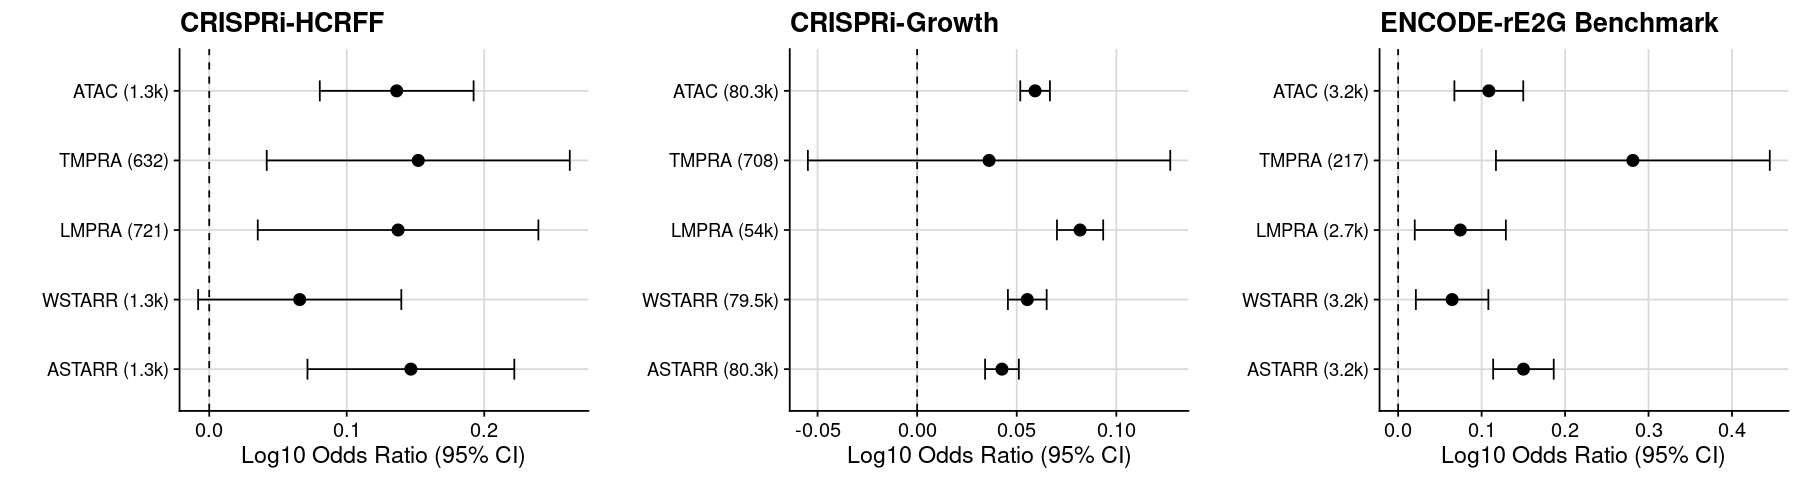

In [37]:
dat = dat_logit_stats
dat = dat %>% dplyr::mutate(Assay = paste0(Assay_STARRMPRA, " (", fun(Size), ")"))
dat = dat %>%
    dplyr::mutate(
        Assay_STARRMPRA = factor(Assay_STARRMPRA, levels=VEC_TXT_ASSAY_INP),
        Assay_CRISPR    = factor(Assay_CRISPR,    levels=VEC_TXT_ASSAY_OUT)
    ) %>%
    dplyr::arrange(Assay_STARRMPRA) %>%
    dplyr::mutate(Assay = factor(Assay, levels = Assay))

lst = split(dat, dat$Assay_CRISPR)
lst = lapply(names(lst), function(idx){
    txt = idx
    dat = lst[[idx]]
    
    gpt = ggplot(dat, aes(x = Log10OR, y = Assay)) +
        geom_point(size = 3) +
        geom_errorbarh(aes(xmin = Log10OR_CI_Lower, xmax = Log10OR_CI_Upper), height = 0.3) +
        geom_vline(xintercept = 0, linetype="dashed") +
        labs(x = "Log10 Odds Ratio (95% CI)", y = "", title = txt) +
        theme_cowplot() +
        background_grid() +
        theme(
            strip.text = element_text(face = "bold"),
            axis.text.y = element_text(size = 11)
        )
    return(gpt)
})

plt = plot_grid(plotlist = lst, nrow = 1)

options(repr.plot.height=4, repr.plot.width=15)
print(plt)